# Project/Problem Description

##### The Framingham Heart Disease Prediction Project is a Supervised Machine learning Model developed using Python codes which accurately predicts if a patient is at risk of a coronary heart disease or not when provided with revelant features of a dataset. 

##### I was able to develop this model by using the Framingham heart study dataset hosted on the Kaggle platform as part of my project for the KaggleX BIPOC Mentorship Progam (Cohort 3).

### Import Libraries 

In [1]:
# Data Manipulation & Analysis

import numpy as np
import pandas as pd

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

# Classifier Libraries 
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

# Evaluation Metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix 

import warnings 
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
# Read and display the dataset using the pandas dataframe 

df=pd.read_csv(r"C:\Users\shopinverse\Documents\Python Datasets\Heart Disease Datasets\Framingham heart study dataset\framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
# Display general information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
# Display the dataset in terms of matrix shape

df.shape

(4240, 16)

In [5]:
# Display the statistical information about the dataset

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# View in details the glucose feature in the dataset which contains NaN values.

df['glucose'].describe

<bound method NDFrame.describe of 0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4235     86.0
4236      NaN
4237    107.0
4238     72.0
4239     80.0
Name: glucose, Length: 4240, dtype: float64>

## Data Pre-Processing 

In [7]:
# Finding missing data in the dataset 

print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


Some features in the dataset have missing values. These features are education, BPMeds, totChol, BMI, heartRate and glucose. 

In [8]:
# Fill the NaN cells in the dataset with their mean values by way of data inputation to address missing data. 
# Assign the new dataset with inputted mean values to a new dataframe - df1

df1=df.fillna(df.mean())

In [9]:
# Display the new dataframe - df1 after data inputtation. 

df1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2.0,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [10]:
# Reconfirmation to show missing data have been handled correctly.

print(df1.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


There are no more missing data as NA cells have been filled with their mean values.

In [11]:
# Finding duplicate data in the dataset 

print(df1.duplicated().sum())

0


There are no duplicate values or data within the dataset.

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [13]:
# Convert features - education and cigsPerDay to from float to int64 dtypes.

df1['education'] = df1['education'].astype(int)
df1['cigsPerDay'] = df1['cigsPerDay'].astype(int)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   int32  
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   int32  
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int32(2), int64(7)
memory usage: 497.0 KB


In [15]:
df1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2,0,0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,1,20,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3,1,30,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3,1,23,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2,1,20,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,1,15,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2,0,0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3,0,0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [16]:
# Repace the male feature with Gender and drop-off male feature

df1['Gender']=df1[['male']]
df1.drop(['male'], axis=1, inplace=True)

In [17]:
df1

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender
0,39,4,0,0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0,1
1,46,2,0,0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0,0
2,48,1,1,20,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0,1
3,61,3,1,30,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1,0
4,46,3,1,23,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,48,2,1,20,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,0
4236,44,1,1,15,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0,0
4237,52,2,0,0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0,0
4238,40,3,0,0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0,1


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4240 non-null   int64  
 1   education        4240 non-null   int32  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   int32  
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
 15  Gender           4240 non-null   int64  
dtypes: float64(7), int32(2), int64(7)
memory usage: 497.0 KB


In [19]:
# Statistical description

df1.describe()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,1.955189,0.494104,9.005896,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887,0.429245
std,8.572942,1.018522,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953,0.495027
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000,0.000000
75%,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000,1.000000
max,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000


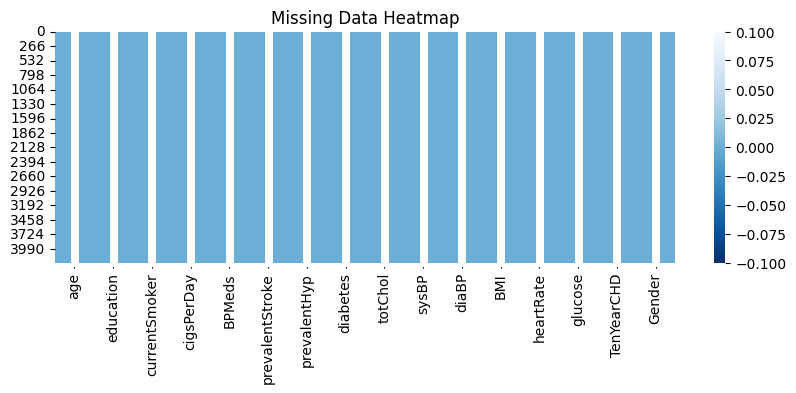

In [20]:
# Visualizing missing values using a heatmap 

plt.figure(figsize=(10,3))
sns.heatmap(df1.isnull(), annot=True, cmap='Blues_r')
plt.title('Missing Data Heatmap')
plt.show();

Heatmap confirmation of no missing values or data in the dataframe.

# Exploratory Data Analysis (EDA)

## Univariate Data Analysis 

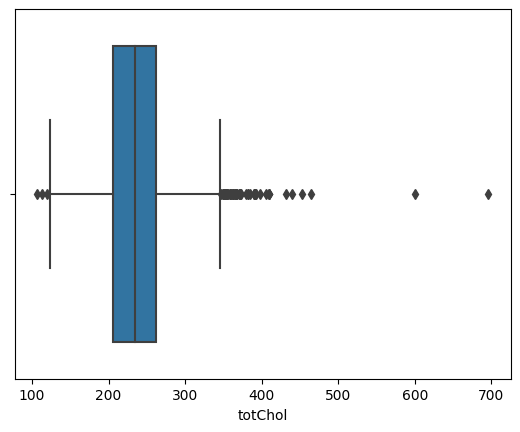

In [21]:
# Checking for Outliers in the totChol feature.

sns.boxplot(x=df1['totChol']);

The mean value for the total cholestrol level feature (totChol) is 236.69 with significant outliers in the dataset.

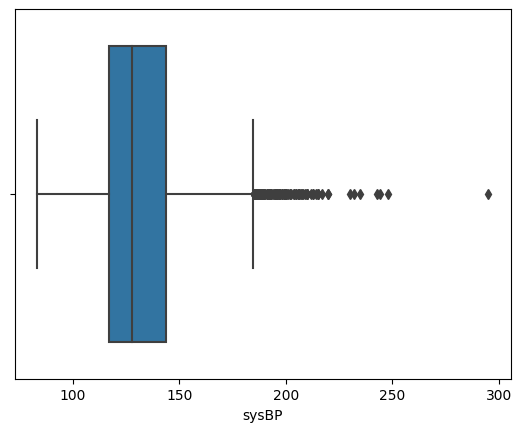

In [22]:
# Checking for Outliers in the sysBP feature.

sns.boxplot(x=df1['sysBP']);

The mean value for the total systolic blood pressure feature (sysBP) is 132.35 with significant outliers in the dataset.

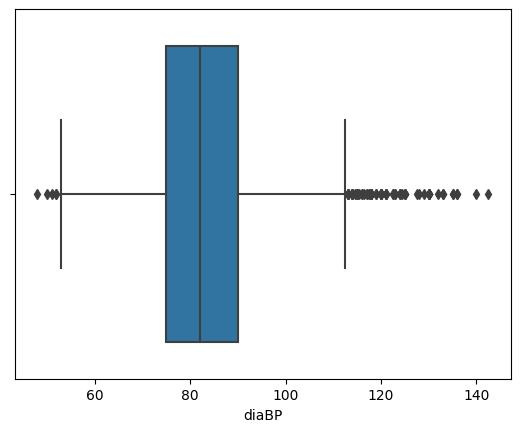

In [23]:
# Checking for Outliers in the diaBP feature.

sns.boxplot(x=df1['diaBP']);

The mean value for the diastolic blood pressure feature (diaBP) is 82.89 with significant outliers in the dataset.

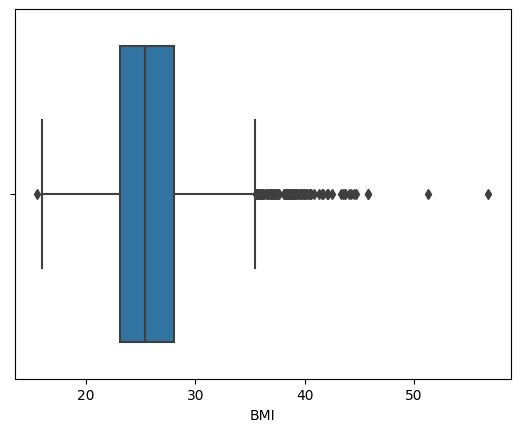

In [24]:
# Checking for Outliers in the BMI feature.

sns.boxplot(x=df1['BMI']);

The mean value for the BMI feature (BMI) is 25.80 with significant outliers in the dataset.

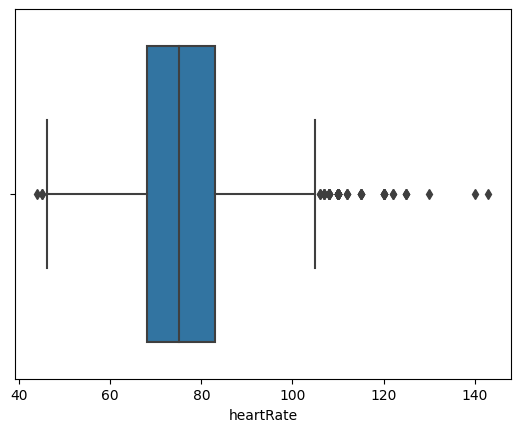

In [25]:
# Checking for Outliers in the heartRate feature.

sns.boxplot(x=df1['heartRate']);

The mean value for the heart rate feature (heartRate) is 75.87 with significant outliers in the dataset.

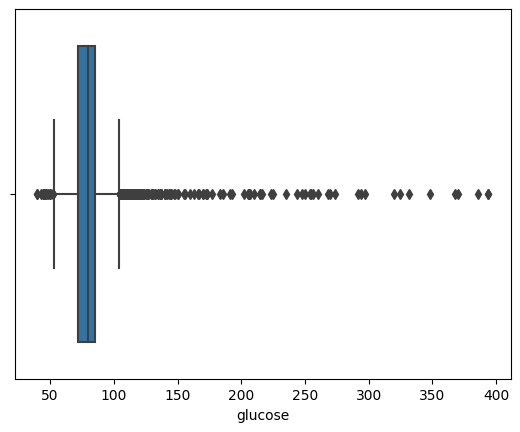

In [26]:
# Checking for Outliers in the glucose feature.

sns.boxplot(x=df1['glucose']);

The mean value for the glucose level feature (glucose) is 81.96 with significant outliers in the dataset.

In [27]:
# A function to group heart disease patients 

def heart_disease(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

# Applying the above function
df1['TenYearCHD_Group'] = df1['TenYearCHD'].apply(heart_disease)

In [28]:
df1.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender,TenYearCHD_Group
0,39,4,0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,No
1,46,2,0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,No
2,48,1,1,20,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,No
3,61,3,1,30,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,Yes
4,46,3,1,23,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,No


In [29]:
# Counting & printing the Ten years Coronary Heart Disease numbers in the dataframe.

print(df['TenYearCHD'].value_counts())

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


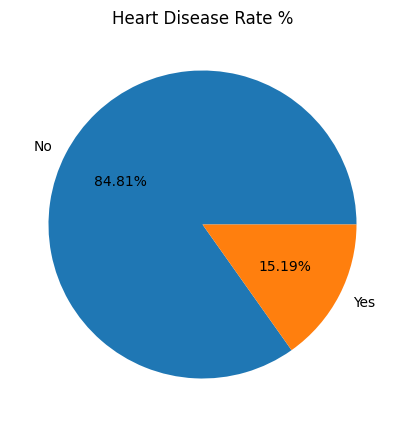

In [30]:
# Visualizing  the TenYearCHD feature in terms of Percentage distribution. 
from collections import Counter

fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df1["TenYearCHD_Group"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Heart Disease Rate %");

The pie chart above shows percentage of patients with heart disease presently at 15%, while 85% represents percentage of patients with no heart disease.

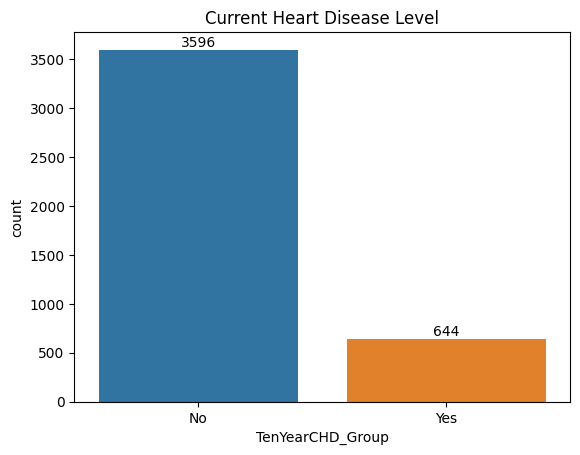

In [31]:
# Visualizing the TenYearCHD feature in terms of bar distribution. 

ax=sns.countplot(x=df1["TenYearCHD_Group"], order=df1["TenYearCHD_Group"].value_counts(ascending=False).index)
values=df1["TenYearCHD_Group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Current Heart Disease Level");

The bar chart above shows the current heart disease level amongst patients at Framingham. Out of a total of 4,240 patients, about 644 patients representing 15% have heart disease while the remaining 3,596 representing 85% have no heart related disease. 

In [32]:
# A function to group patients into specific gender groups

def sex(y):
    if y == 1:
        return 'Male'
    else:
        return 'Female'

# Applying the above function
df1['Gender_Group'] = df1['Gender'].apply(sex)

In [33]:
df1.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender,TenYearCHD_Group,Gender_Group
0,39,4,0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,No,Male
1,46,2,0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,No,Female
2,48,1,1,20,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,No,Male
3,61,3,1,30,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,Yes,Female
4,46,3,1,23,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,No,Female


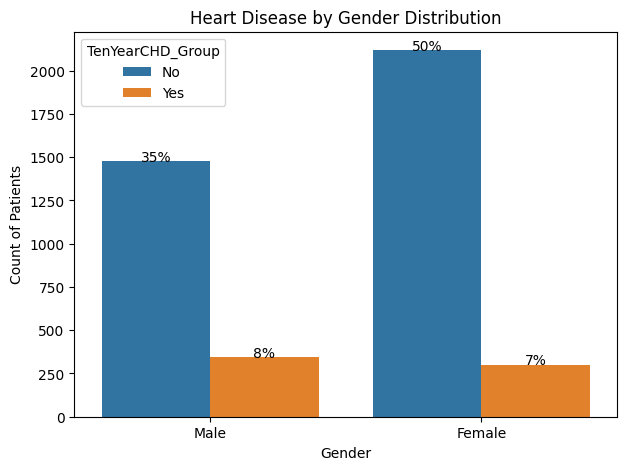

In [34]:
# Investigating heart disease by gender distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='Gender_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Gender Distribution')

# Add percentages to the bars
total_counts = len(df1['Gender_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

This chart shows heart disease by gender distribution at Framingham. Out of the 15% of patients with identified coronary heart disease, male patients were 8% while female patients were 7%. Out of the 85% patients without heart related disease, male patients were 35% while female patients were 50%. 

In [35]:
# A function to group patients into specific age groups

def age_bracket(age):
    if age <= 42:
        return 'Adults(<=42 yrs)'
    elif age <= 53:
        return 'Older Adults(<=53 yrs)'
    elif age <= 64:
        return 'Senior Citizens(<=64 yrs) '
    else:
        return 'Elders(>65 yrs)'

# Applying the above function
df1['Age_Group'] = df1['age'].apply(age_bracket)

In [36]:
df1.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender,TenYearCHD_Group,Gender_Group,Age_Group
0,39,4,0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,No,Male,Adults(<=42 yrs)
1,46,2,0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,No,Female,Older Adults(<=53 yrs)
2,48,1,1,20,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,No,Male,Older Adults(<=53 yrs)
3,61,3,1,30,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,Yes,Female,Senior Citizens(<=64 yrs)
4,46,3,1,23,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,No,Female,Older Adults(<=53 yrs)


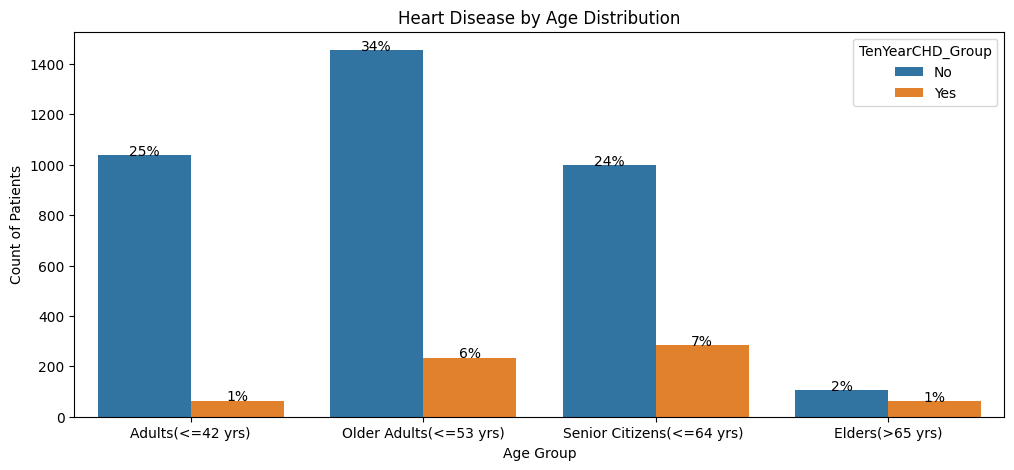

In [37]:
# Investigating heart disease by age distribution.

plt.figure(figsize=(12,5))
ax=sns.countplot(x='Age_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Age Distribution')

# Add percentages to the bars
total_counts = len(df1['Age_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by age distribution, the group with the most related heart disease were the Senior citizens (ages betwwen 53 & 64 years) at 7%, followed by the Older Adults (ages between 42 and 53) at 6%. Both the Adults (ages less than 42) and Elders (ages above 65 years) were the groups of patients with the least at 1%. For patients without heart related diseases, the Older Adults group came tops at 34% followed by the Adults at 25% and Senior Citizens at 24% while the Elders were least at 2%.  

In [38]:
# A function to group patients into specific education groups

def edu_bracket(edu):
    if edu == 1:
        return 'Elementary School'
    elif edu == 2:
        return 'High School'
    elif edu == 3:
        return 'College Degree'
    else:
        return 'Masters Degree'

# Applying the above function
df1['Education_Group'] = df1['education'].apply(edu_bracket)

In [39]:
df1.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender,TenYearCHD_Group,Gender_Group,Age_Group,Education_Group
0,39,4,0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,No,Male,Adults(<=42 yrs),Masters Degree
1,46,2,0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,No,Female,Older Adults(<=53 yrs),High School
2,48,1,1,20,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,No,Male,Older Adults(<=53 yrs),Elementary School
3,61,3,1,30,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,Yes,Female,Senior Citizens(<=64 yrs),College Degree
4,46,3,1,23,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,No,Female,Older Adults(<=53 yrs),College Degree


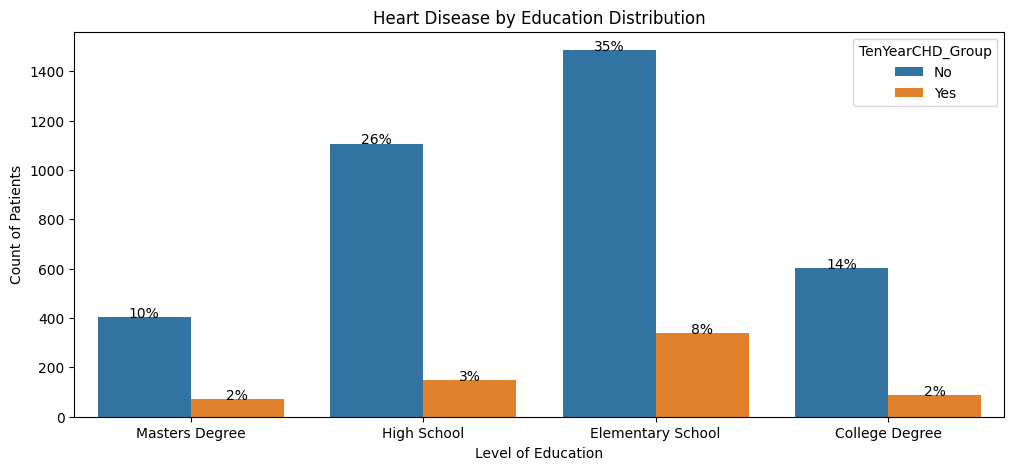

In [40]:
# Investigating heart disease by education distribution.

plt.figure(figsize=(12,5))
ax=sns.countplot(x='Education_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Level of Education')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Education Distribution')

# Add percentages to the bars
total_counts = len(df1['Education_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by education distribution, the group with the most related heart disease were patients with Elementary School qualification at 8%, followed by patients with High School qualification at 3%. Patients with College & Masters Degrees were least at 2% each. For patients without heart related diseases, Patients with Elementary School qualification came tops at 35% followed by patients with High School qualification at 26% and patients with College Degree at 14% while patients with Masters Degree were least at 10%.

In [41]:
# A function to group patients into specific smokers groups

def smoker(b):
    if b == 1:
        return 'Yes'
    else:
        return 'No'

# Applying the above function
df1['Smoker_Group'] = df1['currentSmoker'].apply(smoker)

In [42]:
df1.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,BMI,heartRate,glucose,TenYearCHD,Gender,TenYearCHD_Group,Gender_Group,Age_Group,Education_Group,Smoker_Group
0,39,4,0,0,0.0,0,0,0,195.0,106.0,...,26.97,80.0,77.0,0,1,No,Male,Adults(<=42 yrs),Masters Degree,No
1,46,2,0,0,0.0,0,0,0,250.0,121.0,...,28.73,95.0,76.0,0,0,No,Female,Older Adults(<=53 yrs),High School,No
2,48,1,1,20,0.0,0,0,0,245.0,127.5,...,25.34,75.0,70.0,0,1,No,Male,Older Adults(<=53 yrs),Elementary School,Yes
3,61,3,1,30,0.0,0,1,0,225.0,150.0,...,28.58,65.0,103.0,1,0,Yes,Female,Senior Citizens(<=64 yrs),College Degree,Yes
4,46,3,1,23,0.0,0,0,0,285.0,130.0,...,23.10,85.0,85.0,0,0,No,Female,Older Adults(<=53 yrs),College Degree,Yes


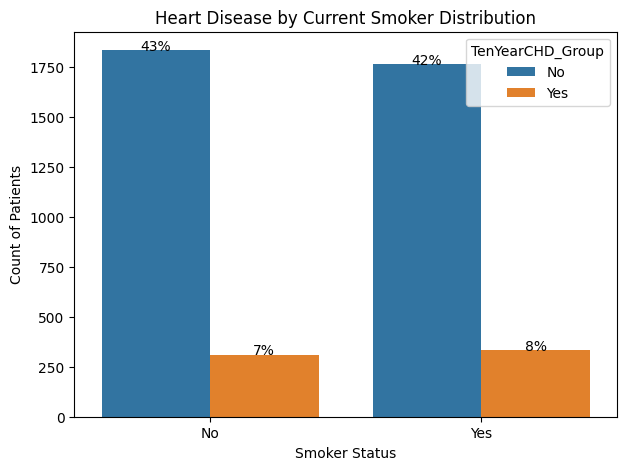

In [43]:
# Investigating heart disease by currentSmoker distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='Smoker_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Smoker Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Current Smoker Distribution')

# Add percentages to the bars
total_counts = len(df1['Smoker_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by current smoker distribution, out of a total of 50% of patients who currently smoke 8% had heart disease while 42% do not have heart disease while out of a total of 50% of patients who do not currently smoke 7% have heart disease while 43% do not have heart disease. 

In [44]:
# A function to group patients into specific BP Medications groups

def BP_Meds(c):
    if c == 1:
        return 'Yes'
    else:
        return 'No'

# Applying the above function
df1['BPMeds_Group'] = df1['BPMeds'].apply(BP_Meds)

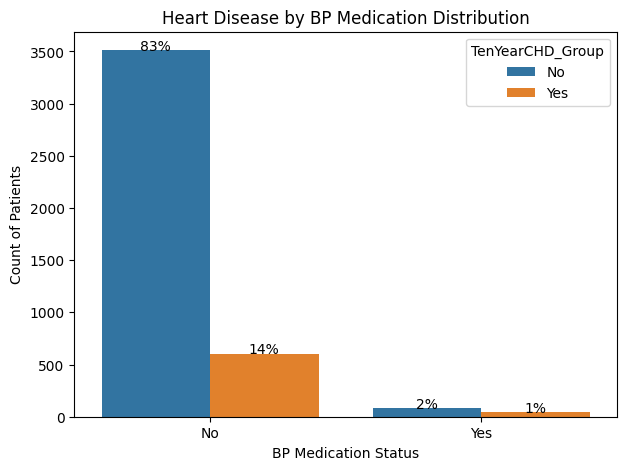

In [45]:
# Investigating heart disease by BPMeds distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='BPMeds_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('BP Medication Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by BP Medication Distribution')

# Add percentages to the bars
total_counts = len(df1['BPMeds_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by BP medication distribution, amongst patients who are not on BP medication 14% had heart disease while 83% had no case of heart related disease while amongst patients who are on BP medication, 2% had no heart related disease while just 1% had. 

In [46]:
# A function to group patients into specific  prevalentStroke groups

def stroke(d):
    if d == 1:
        return 'Yes'
    else:
        return 'No'

# Applying the above function
df1['prevalentStroke_Group'] = df1['prevalentStroke'].apply(stroke)

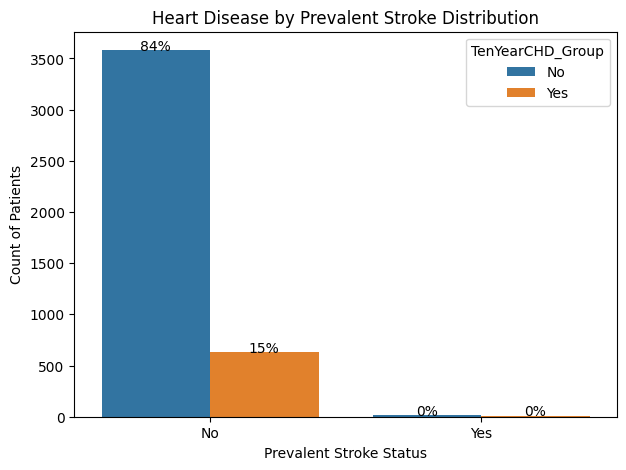

In [47]:
# Investigating heart disease by prevalentStroke distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='prevalentStroke_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Prevalent Stroke Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Prevalent Stroke Distribution')

# Add percentages to the bars
total_counts = len(df1['prevalentStroke_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by prevalent stroke distribution, amongst patients with no prevalent stroke 15% had heart disease while 84% had none while there were no patient with prevalent stroke. 

In [48]:
# A function to group patients into specific  prevalentHyp groups

def hypertension(e):
    if e == 1:
        return 'Yes'
    else:
        return 'No'

# Applying the above function
df1['PrevalentHyp_Group'] = df1['prevalentHyp'].apply(hypertension)

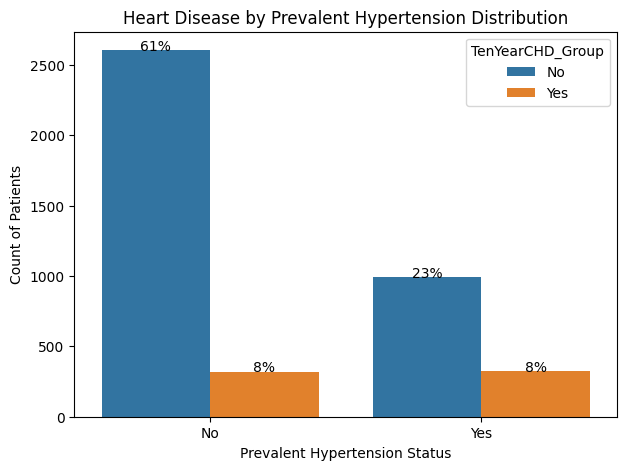

In [49]:
# Investigating heart disease by prevalentHyp distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='PrevalentHyp_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Prevalent Hypertension Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Prevalent Hypertension Distribution')

# Add percentages to the bars
total_counts = len(df1['PrevalentHyp_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by prevalent hypertension distribution, amongst patients with no prevalent hypertension, 8% had heart disease while 61% had none while amongst patients with prevalent hypertension 8% had heart disease while 23% had no related heart disease. 

In [50]:
# A function to group patients into specific diabetes groups

def d_betes(f):
    if f == 1:
        return 'Yes'
    else:
        return 'No'

# Applying the above function
df1['Diabetes_Group'] = df1['diabetes'].apply(d_betes)

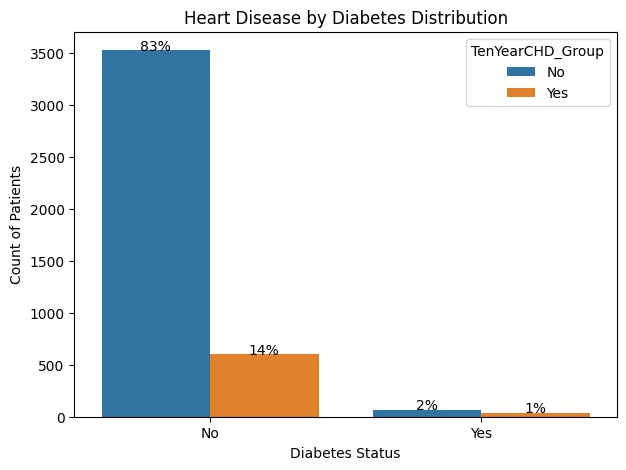

In [51]:
# Investigating heart disease by diabetes distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='Diabetes_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Diabetes Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Diabetes Distribution')

# Add percentages to the bars
total_counts = len(df1['Diabetes_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by diabetes distribution, amongst patients with no diabetes 14% had heart disease while 83% did not have. Amongst patients with diabetes, 1% had heart disease while 2% did not have heart related disease. 

In [52]:
# A function to group patients into specific BMI groups

def bmi_class(g):
    if g < 18.00:
        return 'Underweight(<18)'
    elif g < 25.00:
        return 'Healthyweight(<25)'
    elif g < 30.00:
        return 'Overweight(<30)'
    elif g < 40.00:
        return 'Obesity(<40)'
    else:
        return 'Severe Obesity(>=40)'

# Applying the above function
df1['BMI_Group'] = df1['BMI'].apply(bmi_class)

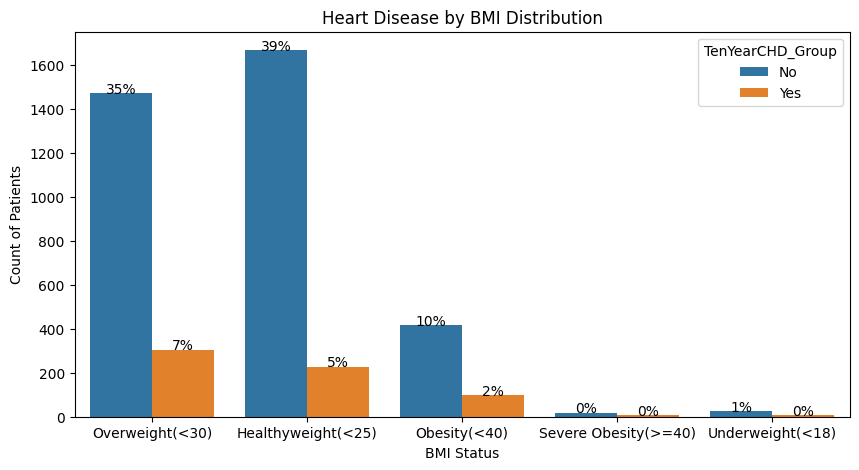

In [53]:
# Investigating heart disease by BMI distribution.

plt.figure(figsize=(10,5))
ax=sns.countplot(x='BMI_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('BMI Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by BMI Distribution')

# Add percentages to the bars
total_counts = len(df1['BMI_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

Regarding heart disease by BMI distribution, patients that were overweight had the highest risk of heart disease at 7% followed by patients with healthy weight at 5% while the least were Obes patients at 2%. 

In [54]:
# A function to group patients into specific total cholesterol groups

def chol_class(h):
    if h < 200:
        return 'Healthy Heart(<200)'
    elif h < 239:
        return 'At-Risk Heart(<239)'
    else:
        return 'Dangerous level(>=240)'

# Applying the above function
df1['TotChol_Group'] = df1['totChol'].apply(chol_class)

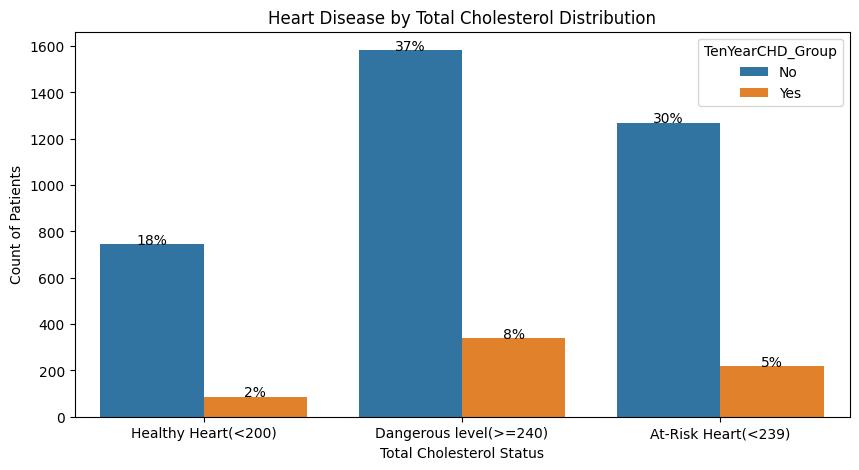

In [55]:
# Investigating heart disease by Total Cholesterol distribution.

plt.figure(figsize=(10,5))
ax=sns.countplot(x='TotChol_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Total Cholesterol Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Total Cholesterol Distribution')

# Add percentages to the bars
total_counts = len(df1['TotChol_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by total cholesterol distribution, patients with dangerous level of total cholestrol had the highest risk at 8% followed by patients at risky heart at 5% while healthy heart patients were at 2%

In [56]:
# A function to group patients into specific heart rate groups

def heart_rate_class(j):
    if j < 60:
        return 'Slow Heart Rate(<60)'
    elif j < 100:
        return 'Normal Heart Rate(<100)'
    else:
        return 'Fast Heart Rate(>=100)'

# Applying the above function
df1['HeartRate_Group'] = df1['heartRate'].apply(heart_rate_class)

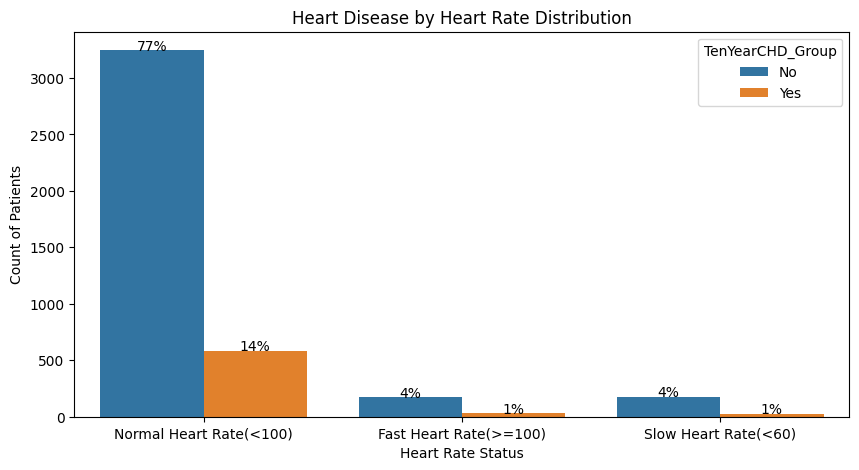

In [57]:
# Investigating heart disease by Heart Rate distribution.

plt.figure(figsize=(10,5))
ax=sns.countplot(x='HeartRate_Group', data=df1, hue='TenYearCHD_Group')
plt.xlabel('Heart Rate Status')
plt.ylabel('Count of Patients')
plt.title('Heart Disease by Heart Rate Distribution')

# Add percentages to the bars
total_counts = len(df1['HeartRate_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

In terms of heart disease by heart rate distribution, most of the patients with heart related disease have normal heart rate (between 60 to 100).

### Bivariate Data Analysis

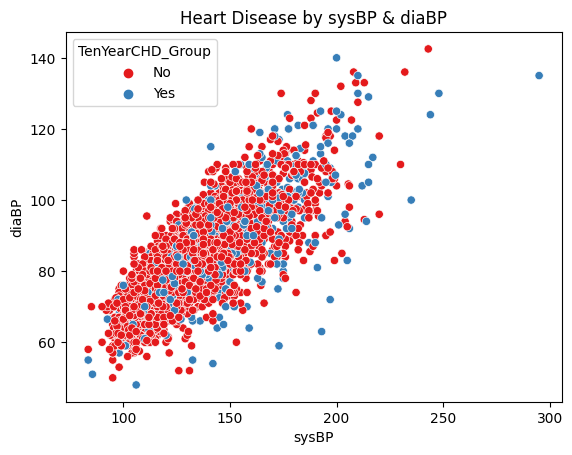

In [58]:
# Visualizing the relationship between Tenure & Monthly Charges by Churn

# Create a scatterplot with 'sysBP' on the y-axis and 'diaBP' on the x-axis, with 'TenYearHCD_Group' as hue
sns.scatterplot(y='diaBP', x='sysBP', data=df1, hue='TenYearCHD_Group', palette='Set1')

# Customize the plot
plt.title("Heart Disease by sysBP & diaBP")

plt.show();

Patients that have a higher sysBP and diaBP of more than 120/80 are at risk of having heart related disease. 

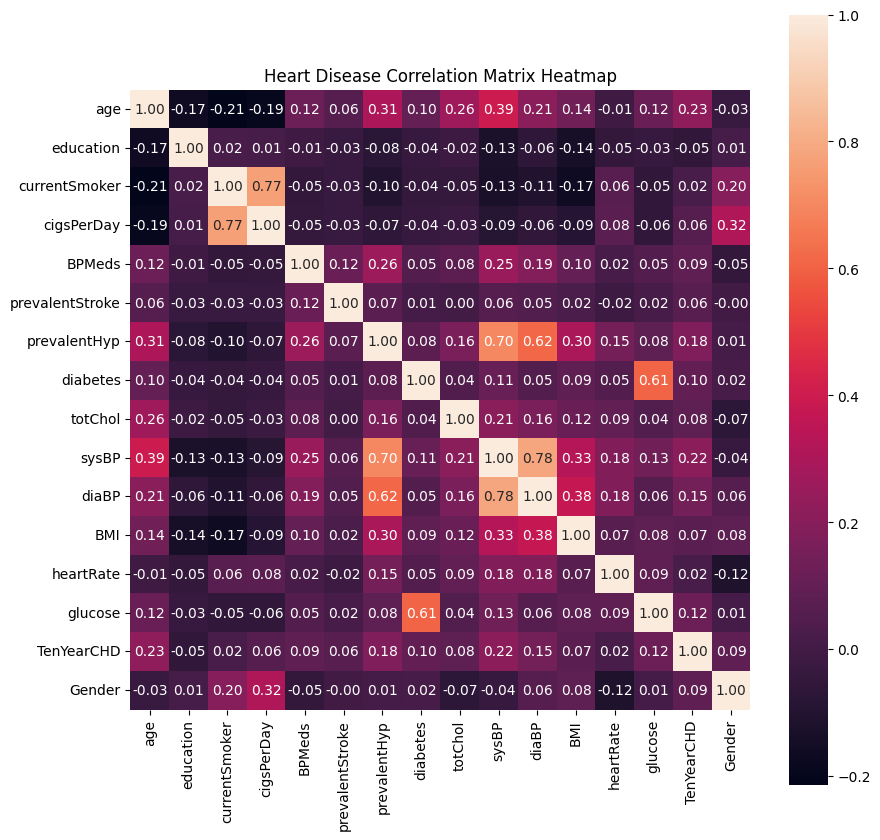

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns
non_numeric_cols = df1.select_dtypes(include=['object']).columns

# Drop non-numeric columns or convert them if needed
df1_numeric = df1.drop(columns=non_numeric_cols)

# Calculate the correlation matrix
correlation_matrix = df1_numeric.corr()

# Set up the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Heart Disease Correlation Matrix Heatmap')
plt.show()

There are certain features which have a postive relationship with the target variable - heart disease, however, these features have a weak positive relationship with the target variable. These features are patient's age, prevalent hypertension, diabetes, sysBP, diaBP and glucose while education is the only feature that has a weak negative relationship with heart disease. 

In [60]:
df1.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Gender',
       'TenYearCHD_Group', 'Gender_Group', 'Age_Group', 'Education_Group',
       'Smoker_Group', 'BPMeds_Group', 'prevalentStroke_Group',
       'PrevalentHyp_Group', 'Diabetes_Group', 'BMI_Group', 'TotChol_Group',
       'HeartRate_Group'],
      dtype='object')

In [61]:
# Create a deep copy of df1 and assign it to df2
df2 = df1.copy()

# Now, df2 is a separate DataFrame with the same data as df1

In [62]:
# Segment the dataframe into target_label
target_label=df2[['TenYearCHD']]

In [63]:
target_label.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


In [64]:
df2.dtypes

age                        int64
education                  int32
currentSmoker              int64
cigsPerDay                 int32
BPMeds                   float64
prevalentStroke            int64
prevalentHyp               int64
diabetes                   int64
totChol                  float64
sysBP                    float64
diaBP                    float64
BMI                      float64
heartRate                float64
glucose                  float64
TenYearCHD                 int64
Gender                     int64
TenYearCHD_Group          object
Gender_Group              object
Age_Group                 object
Education_Group           object
Smoker_Group              object
BPMeds_Group              object
prevalentStroke_Group     object
PrevalentHyp_Group        object
Diabetes_Group            object
BMI_Group                 object
TotChol_Group             object
HeartRate_Group           object
dtype: object

In [65]:
# Select only relevant features required to train my model and store in a new dataframe (df3). Drop-off irrelevant categorical columns used for earlier visualization.
df3=df2[['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Gender']]

In [66]:
df3.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender
0,39,4,0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1
1,46,2,0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1,1,20,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1
3,61,3,1,30,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0
4,46,3,1,23,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [67]:
df3.dtypes

age                  int64
education            int32
currentSmoker        int64
cigsPerDay           int32
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Gender               int64
dtype: object

In [68]:
# Normalizing or standardizing the features in the dataset.

from sklearn.preprocessing import MinMaxScaler
''' Assign the MinMaxScaler function to the variable scaler '''
scaler=MinMaxScaler()

''' Reshape each feature with outlier using the scaler-fit-transform function and assigned to new features'''
df3['Scaled_age']=scaler.fit_transform(df3[['age']].values.reshape(-1,1))
df3['Scaled_education']=scaler.fit_transform(df3[['education']].values.reshape(-1,1))
df3['Scaled_cigsPerDay']=scaler.fit_transform(df3[['cigsPerDay']].values.reshape(-1,1))
df3['Scaled_totChol']=scaler.fit_transform(df3[['totChol']].values.reshape(-1,1))
df3['Scaled_sysBP']=scaler.fit_transform(df3[['sysBP']].values.reshape(-1,1))
df3['Scaled_diaBP']=scaler.fit_transform(df3[['diaBP']].values.reshape(-1,1))
df3['Scaled_BMI']=scaler.fit_transform(df3[['BMI']].values.reshape(-1,1))
df3['Scaled_heartRate']=scaler.fit_transform(df3[['heartRate']].values.reshape(-1,1))
df3['Scaled_glucose']=scaler.fit_transform(df3[['glucose']].values.reshape(-1,1))


''' Drop-off the irrelevant features '''
df3.drop(['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], axis=1, inplace=True)

df3.head()

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,Gender,Scaled_age,Scaled_education,Scaled_cigsPerDay,Scaled_totChol,Scaled_sysBP,Scaled_diaBP,Scaled_BMI,Scaled_heartRate,Scaled_glucose
0,0,0.0,0,0,0,1,0.184211,1.000000,0.000000,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0,0.0,0,0,0,0,0.368421,0.333333,0.000000,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,1,0.0,0,0,0,1,0.421053,0.000000,0.285714,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,1,0.0,0,1,0,0,0.763158,0.666667,0.428571,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,1,0.0,0,0,0,0,0.368421,0.666667,0.328571,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119


Class distribution after SMOTE:
TenYearCHD
0    3596
1    3596
Name: count, dtype: int64


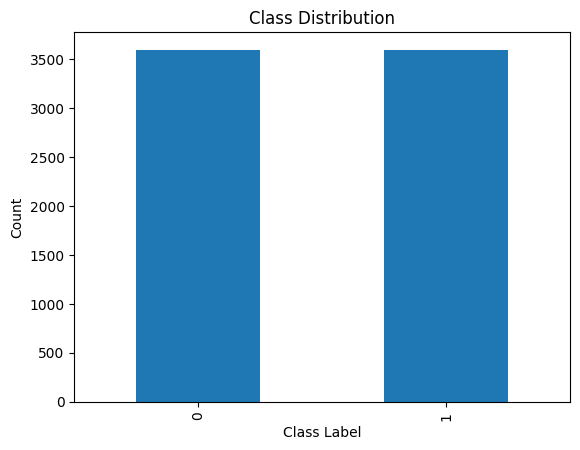

In [69]:
# Oversampling: Generate synthetic samples for the minority class to balance the class distribution.
# Code using the imbalanced-learn library for both oversampling (SMOTE)


import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Note that 'df2' is my DataFrame with 'Churn_Type' as the target variable
X = df3  # Features
y = df2['TenYearCHD']  # Target variable

# Instantiate SMOTE
over = SMOTE(sampling_strategy='auto', random_state=42)  # adjust the sampling strategy as needed
steps = [('o', over)]
pipeline = Pipeline(steps=steps)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check the class distribution after SMOTE
class_distribution = pd.Series(y_resampled).value_counts()
print("Class distribution after SMOTE:")
print(class_distribution)

# Visualize the class distribution after SMOTE
class_distribution.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()


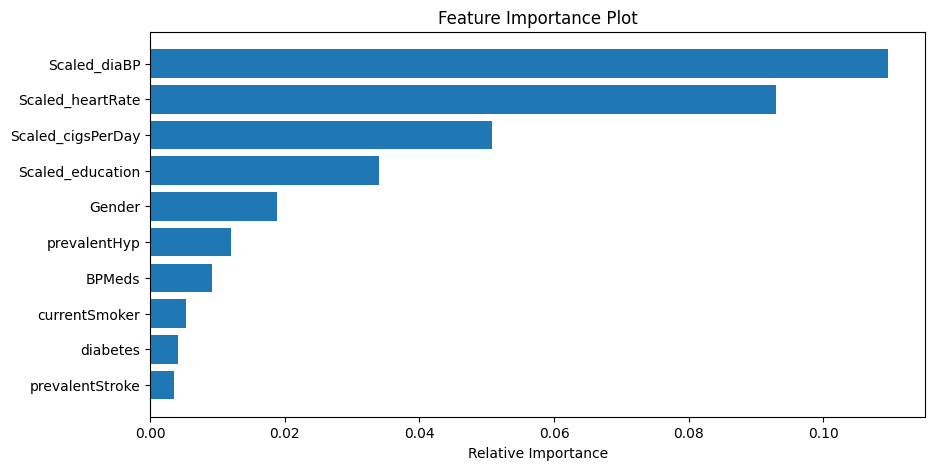

In [70]:
# Checking for the important features to the target variable 

from sklearn.ensemble import RandomForestRegressor

feat_im=RandomForestRegressor()
feat_im.fit(df3, target_label)
feat_name=list(df3.columns)
importances=feat_im.feature_importances_
indices=np.argsort(importances)[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(indices)), importances[indices],align='center')
plt.yticks(range(len(indices)), [feat_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance Plot');

### Data Splitting

In [71]:
# Training set (70%): This is used to train the machine learning models. 
# The models learn patterns and relationships in the data from this portion.

from sklearn.model_selection import train_test_split

# Split the data into training and temporary (validation + test) sets. Note, dataset = X_resampled and target label = y_resampled 
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42) # Use test_size=0.3 for 70% training data. 

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42) # use test_size=0.5 for 15% validation and 15% test data.

# Now I have X_train_temp, y_train_temp for training,
# X_val, y_val for validation, and X_test, y_test for testing.

In [72]:
# X_resampled is the original feature matrix, typically representing part of the entire dataset.

X_resampled.shape

(7192, 15)

In [73]:
# y_resampled is the target variable, typically representing part of the entire dataset.

y_resampled.shape

(7192,)

In [74]:
# shape of training questions (70%)
# This variable will hold the feature matrix for the training dataset. 
# It will contain approximately 70% of the original data (since test_size is set to 0.3, meaning a 70-30 split).

X_train_temp.shape

(5034, 15)

In [75]:
# shape of training answers (70%)
# This variable will hold the target variable corresponding to the training dataset. 
# It will contain the corresponding labels for the data in X_train_temp

y_train_temp.shape

(5034,)

In [76]:
# This variable will hold the feature matrix for the remaining data, which is not part of the training set. 
# This portion will be used for validation and testing. It will contain approximately 30% of your original data.

X_temp.shape

(2158, 15)

In [77]:
# This variable will hold the target variable corresponding to the remaining data (validation and testing data). 
# It will contain the corresponding labels for the data in X_temp.

y_temp.shape

(2158,)

In [78]:
# This variable will hold the feature matrix for your validation dataset. 
# It is created by splitting X_temp, which contains approximately 30% of the original data after the initial split. 
# With test_size set to 0.5, this means that half of the remaining data (15% of the original data) will be used for validation

X_val.shape

(1079, 15)

In [79]:
# This variable will hold the target variable corresponding to the validation dataset. It contains the corresponding labels for the data in X_val.

y_val.shape

(1079,)

In [80]:
# This variable will hold the feature matrix for the test dataset. It is also created from the X_temp data. 
# Like the validation set, it will contain approximately 15% of your original data.

X_test.shape

(1079, 15)

In [81]:
# This variable will hold the target variable corresponding to the test dataset. It contains the corresponding labels for the data in X_test.

y_test.shape

(1079,)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Define the models and their respective hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(),
                            {
                                'max_iter': [100, 200, 300],  # Corrected parameter name to 'max_iter'
                                'C': [0.1, 1, 10],
                                'penalty': ['l1', 'l2'],  # Removed 'elasticnet' as it's not applicable
                            }),

    'Random Forest': (RandomForestClassifier(),
                      {
                          'n_estimators': [100, 200, 300],
                          'max_depth': [None, 10, 20, 30],
                          'min_samples_split': [2, 5, 10],
                          'min_samples_leaf': [1, 2, 4],
                          'bootstrap': [True, False]
                      }),
    'XGB Classifier': (XGBClassifier(),
                       {
                           'n_estimators': [100, 200, 300],
                           'max_depth': [3, 4, 5],
                           'learning_rate': [0.01, 0.1, 0.2]
                       }),
    'Naive Bayes': (GaussianNB(), {}),
    'SGD Classifier': (SGDClassifier(),
                       {
                           'alpha': [0.0001, 0.001, 0.01],
                           'penalty': ['l2', 'l1'],
                       }),
    'K-Neighbor': (KNeighborsClassifier(),
                   {
                       'n_neighbors': [3, 5, 7],
                       'weights': ['uniform', 'distance']
                   }),
    'Decision Tree': (DecisionTreeClassifier(),
                      {
                          'max_depth': [None, 10, 20, 30],
                          'min_samples_split': [2, 5, 10],
                          'min_samples_leaf': [1, 2, 4]
                      }),
    'SVC': (SVC(),
            {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }),
    'Light Gradient Boost': (LGBMClassifier(),
                             {
                                 'n_estimators': [100, 200, 300],
                                 'max_depth': [3, 4, 5],
                                 'learning_rate': [0.01, 0.1, 0.2]
                             })
}

# Loop through each model and perform hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_temp, y_train_temp)

    best_params = grid_search.best_params_
    validation_accuracy = grid_search.best_estimator_.score(X_val, y_val)
    
    print(f"Model: {model_name}")
    print("Best Hyperparameters:", best_params)
    print("Validation Accuracy:", validation_accuracy)
    print("\n")


Model: Logistic Regression
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Validation Accuracy: 0.6570898980537535


Model: Random Forest
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: 0.8841519925857275


Model: XGB Classifier
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Validation Accuracy: 0.8776645041705282


Model: Naive Bayes
Best Hyperparameters: {}
Validation Accuracy: 0.6042632066728453


Model: SGD Classifier
Best Hyperparameters: {'alpha': 0.001, 'penalty': 'l2'}
Validation Accuracy: 0.6635773864689527


Model: K-Neighbor
Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Validation Accuracy: 0.8137164040778498


Model: Decision Tree
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Validation Accuracy: 0.7488415199258572


Model: SVC
Best Hyperparameters: {'C': 10, 

In [83]:
# Building an XGB Classifier Validation Model
xgbc=XGBClassifier()

# Train the model
xgbc.fit(X_train_temp, y_train_temp)

# Predict the model
xgbc_pred=xgbc.predict(X_val)

# Evaluate the model
print("XGBClassifier Validation Model")
print()
print("Accuracy:", accuracy_score(y_val, xgbc_pred))
print("Precision:", precision_score(y_val, xgbc_pred))
print("Recall:", recall_score(y_val, xgbc_pred))
print("F1-Score:", f1_score(y_val, xgbc_pred))
print("AUC-ROC:", roc_auc_score(y_val, xgbc_pred))

XGBClassifier Validation Model

Accuracy: 0.8748841519925857
Precision: 0.9054325955734407
Recall: 0.8364312267657993
F1-Score: 0.8695652173913044
AUC-ROC: 0.8747775357488885


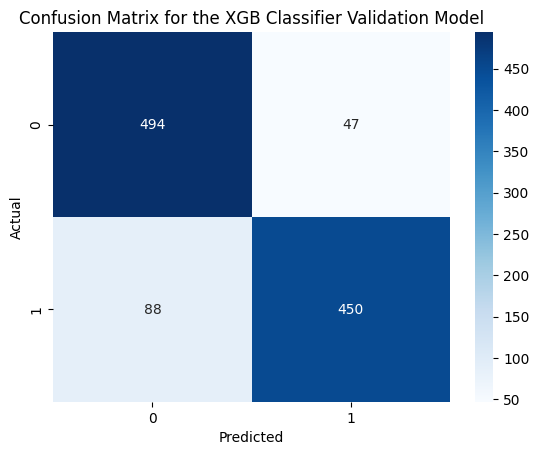

In [84]:
# Building a Confusion Matrix for the XGB Classifier Validation Model

xgbcvm=confusion_matrix(y_val, xgbc_pred)

#Visualize the Confusion Matrix
sns.heatmap(xgbcvm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the XGB Classifier Validation Model')
plt.show();

In [85]:
# Testing set (15%): This set is completely independent and is used to evaluate the final, selected model(s) on data it has never seen before. 
# It provides an unbiased estimate of the model's performance on unseen data.

# Replace 'best_model' with your actual best-performing model

best_model = XGBClassifier()  # Replace 'best_model' with your actual best model

best_model.fit(X_train_temp, y_train_temp)  # Fit the model with your training data

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# You can now work with 'test_predictions', which contains the predicted labels for your test data.

# Evaluate the model. 
print("XGB Classifier Model")
print()
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Precision:", precision_score(y_test, test_predictions))
print("Recall:", recall_score(y_test, test_predictions))
print("F1-Score:", f1_score(y_test, test_predictions))
print("AUC-ROC:", roc_auc_score(y_test, test_predictions))

XGB Classifier Model

Accuracy: 0.8999073215940686
Precision: 0.9178082191780822
Recall: 0.8766355140186916
F1-Score: 0.8967495219885276
AUC-ROC: 0.8997148158328752


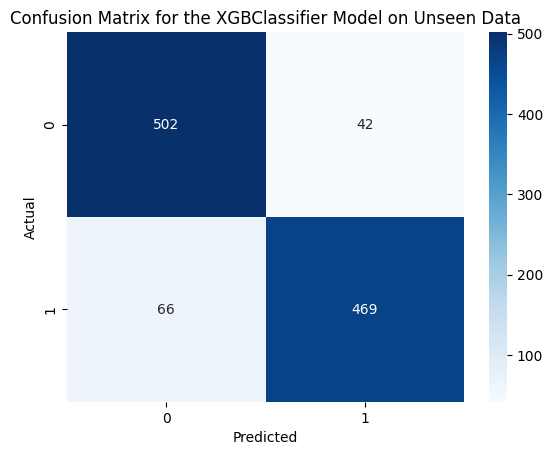

In [88]:
# Building a Confusion Matrix for XGBClassifier for the 15% unseen data
xgbcm=confusion_matrix(y_test, test_predictions)

#Visualize the Confusion Matrix
sns.heatmap(xgbcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the XGBClassifier Model on Unseen Data')
plt.show();

## Create a Pickle File for the best model

In [90]:
# Create a Pickle file using serialization 

import pickle

# Create and assign a file path where the model will be saved locally
file_path='C:/Users/Shopinverse/Documents/FastAPI Project/Heart Disease/XGBclassifier.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(xgbc, file)

In [97]:
import pickle
import numpy as np

# Load classifier/model to perform prediction
file_path ='C:/Users/Shopinverse/Documents/FastAPI Project/Heart Disease/XGBclassifier.pkl'

# Prepare input data for prediction
input_data = np.array([[1, 0.0, 0, 0, 0, 1, 0.460023, 0.333333, 0.354413, 0.266645, 0.238951, 0.357362, 0.320774, 0.349836, 0.098870]])

# Load the model
with open(file_path, 'rb') as file:
    clf = pickle.load(file)

# Make predictions
prediction = clf.predict(input_data)
print(prediction)


[1]


In [91]:
X_train_temp.head()

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,Gender,Scaled_age,Scaled_education,Scaled_cigsPerDay,Scaled_totChol,Scaled_sysBP,Scaled_diaBP,Scaled_BMI,Scaled_heartRate,Scaled_glucose
2004,0,0.0,0,0,0,0,0.315789,0.000000,0.000000,0.144312,0.134752,0.148148,0.361852,0.313131,0.118644
1194,0,0.0,0,1,0,0,0.789474,0.000000,0.000000,0.210526,0.475177,0.444444,0.254241,0.262626,0.098870
3827,0,0.0,0,0,0,0,0.184211,0.666667,0.000000,0.140917,0.234043,0.412698,0.401115,0.121212,0.112994
1756,0,0.0,0,0,0,0,0.315789,0.000000,0.000000,0.178268,0.229314,0.359788,0.319438,0.313131,0.093220
497,1,0.0,0,1,0,1,0.342105,0.666667,0.428571,0.213922,0.319149,0.497354,0.330344,0.343434,0.155367


In [94]:
X_train_temp.tail()

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,Gender,Scaled_age,Scaled_education,Scaled_cigsPerDay,Scaled_totChol,Scaled_sysBP,Scaled_diaBP,Scaled_BMI,Scaled_heartRate,Scaled_glucose
3772,1,0.0,0,0,0,1,0.184211,0.333333,0.142857,0.183362,0.087470,0.174603,0.217159,0.242424,0.062147
5191,1,0.0,0,0,0,1,0.460023,0.333333,0.354413,0.266645,0.238951,0.357362,0.320774,0.349836,0.098870
5226,1,0.0,0,1,0,0,0.717361,0.000000,0.161410,0.229371,0.294567,0.332074,0.313705,0.376754,0.148984
5390,0,0.0,0,0,1,1,0.752300,0.333333,0.000000,0.219914,0.166386,0.298621,0.211405,0.265752,0.267107
860,0,0.0,0,0,0,0,0.078947,0.333333,0.000000,0.239389,0.111111,0.264550,0.123606,0.464646,0.112994


In [92]:
y_train_temp.head()

2004    0
1194    0
3827    0
1756    0
497     0
Name: TenYearCHD, dtype: int64

In [93]:
y_train_temp.tail()

3772    0
5191    1
5226    1
5390    1
860     0
Name: TenYearCHD, dtype: int64